# Model development 

## Questions 
- Do I know if the dealer is offereing fair value for my trade-in?
- Do I know if I put a fair value on my car? 

In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sk

In [2]:
# import data 
pathfile = r'C:\Users\QXJ\Desktop\IBM\Analysis data with python\automobile_clean.csv'
df = pd.read_csv(pathfile, index_col = 0)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,highway-L/100km,Norm_height,horsepower-binned,fuel-type-diesel,gas-type-diesel,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,13495,8.703704,0.816054,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,16500,8.703704,0.816054,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,19,26,16500,9.038462,0.876254,Medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,24,30,13950,7.833333,0.908027,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,18,22,17450,10.681818,0.908027,Low,0,1,1,0


## Linear Regression and Multiple Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression()

In [26]:
# highway-mpg vs price 
x = df[['highway-mpg']]
y = df['price']
print(lm.fit(x,y))

LinearRegression()


In [27]:
yhat = lm.predict(x)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [28]:
lm.intercept_

38423.305858157386

In [29]:
lm.coef_

array([-821.73337832])

In [48]:
print("Price = " + str(-821.73337832) + " * Highway-mpg + " +str(38423.30585816) )

Price = -821.73337832 * Highway-mpg + 38423.30585816


In [5]:
# engine-size vs. price
lm1 = LinearRegression()
lm1.fit(df[['engine-size']],df['price'])
lm1

LinearRegression()

In [45]:
print(lm1.intercept_)
print(lm1.coef_)

-7963.338906281049
[166.86001569]


In [50]:
print("Price = " + str(166.86001569)+" * engine-size "+str(-7963.338906281049))

Price = 166.86001569 * engine-size -7963.338906281049


In [53]:
# Hoursepower, Curb-weight, Engine-size, Highway-mpg vs. Price
M = df[['horsepower', 'curb-weight','engine-size','highway-mpg']]
lm.fit(M,df['price'])
lm

LinearRegression()

In [54]:
print(lm.intercept_)
print(lm.coef_)

-15811.863767729232
[53.53022809  4.70805253 81.51280006 36.1593925 ]


In [58]:
print("Price = " + str(-15811.863767729232)+"  +horsepower *"+str(53.53022809)+" + curb-weight * "+str(4.70805253)+" + engine-size *"+str(81.51280006)+" + highweight-mpg *"+str(36.1593925))

Price = -15811.863767729232  +horsepower *53.53022809 + curb-weight * 4.70805253 + engine-size *81.51280006 + highweight-mpg *36.1593925


In [61]:
# normalized-losses and highway-mpg vs price 
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']], df['price'])
lm2

LinearRegression()

In [62]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [63]:
lm2.intercept_

38201.31327245728

In [65]:
print('Price = '+'normalized_losses * '+str(1.49789586)+' + highway-mpg * '+ str(-820.45434016) +' + '+str(38201.31327245728))

Price = normalized_losses * 1.49789586 + highway-mpg * -820.45434016 + 38201.31327245728


## Model Evaluation Using Visualization

### Regression plot

(0.0, 48157.284827250856)

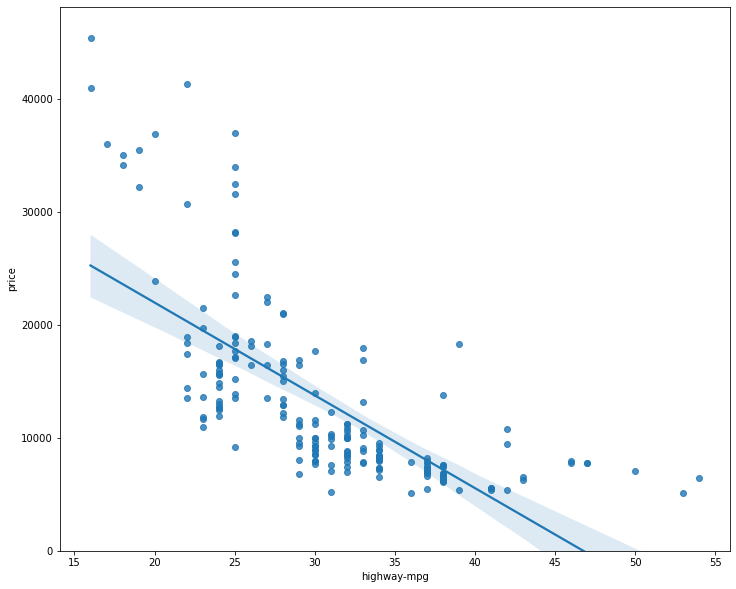

In [7]:
# highway-mpg vs. price
plt.figure(figsize = (12,10))
sns.regplot(x='highway-mpg', y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

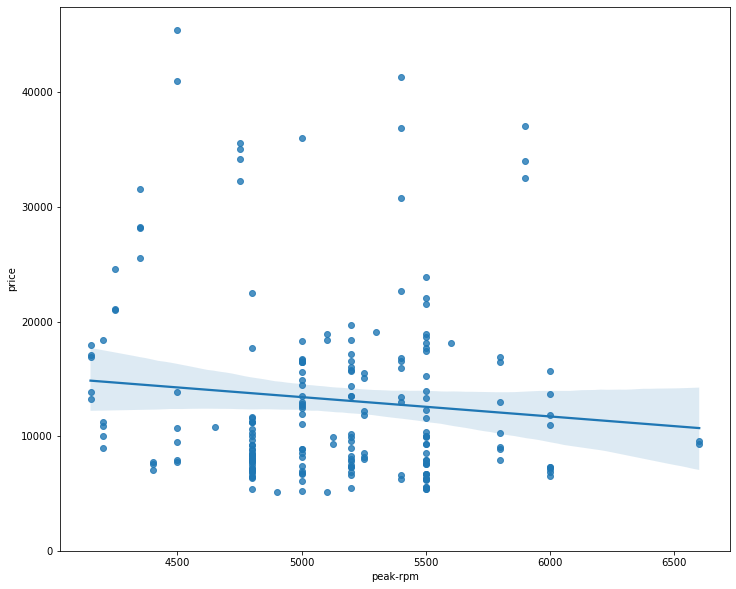

In [10]:
# peak-rpm vs price
plt.figure(figsize = (12,10))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

##### Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases

In [12]:
# determine the correlation between peak-rpm and highway-mpg vs. price
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual plot

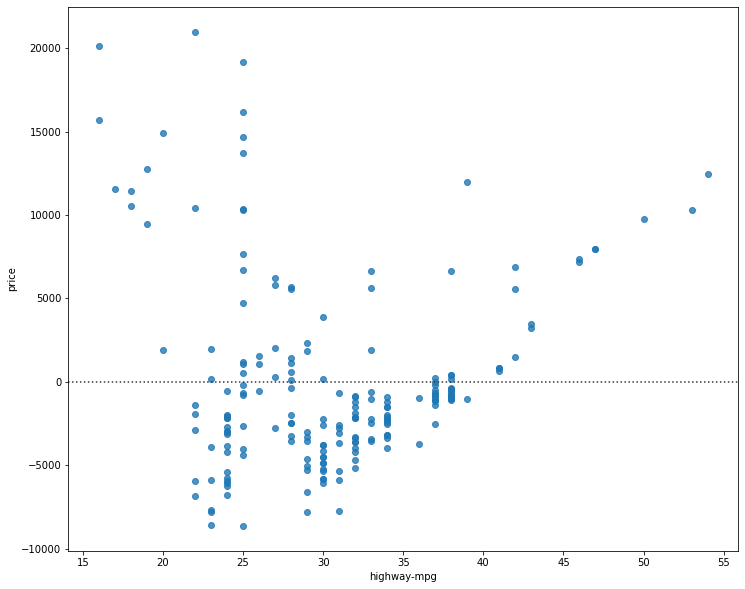

In [15]:
plt.figure(figsize=(12,10))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

#####  The residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### Multiple linear regression

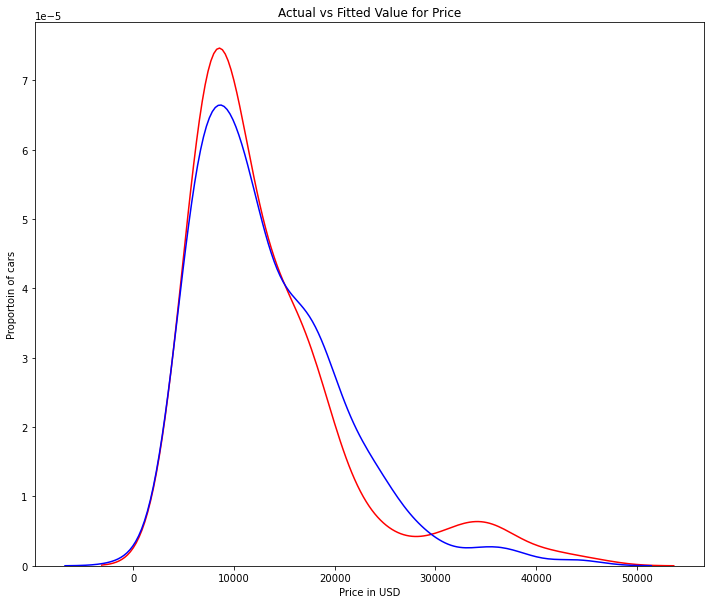

In [32]:
# Distribution plot 
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(z,df['price'])
yhat = lm.predict(z)
plt.figure(figsize = (12,10))
ax0 = sns.kdeplot(df['price'],color = 'r', label = 'Actual value')
sns.kdeplot(yhat,  color ='b', label = 'Fitted Value', ax = ax0)
# displot doesnt not accpet double axises, using kdeplot 

ax0.set_title('Actual vs Fitted Value for Price')
ax0.set_xlabel('Price in USD')
ax0.set_ylabel('Proportoin of cars')
plt.show()

##### The fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Polynomial regression and pipelines

In [63]:
def plotpolly(model, independent_variable, dependent_variable, name):
    x_new =np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    # gca means "get current axes".
    # "Current" here means that it provides a handle to the last active axes. If there is no axes yet, an axes will be created. If you create two subplots, the subplot that is created last is the current one.
    
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of cars')
    
    plt.show()
    plt.close

In [64]:
x = df['highway-mpg']
y = df['price']

In [65]:
# polynomial of the cubic
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


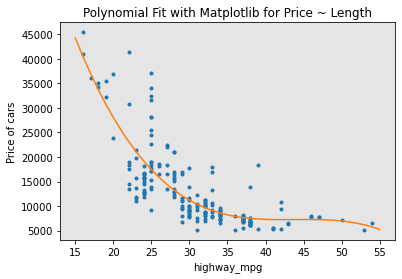

In [66]:
plotpolly(p,x,y,'highway_mpg')

In [51]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

##### We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

In [68]:
# try 11 orders
f = np.polyfit(x,y,11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


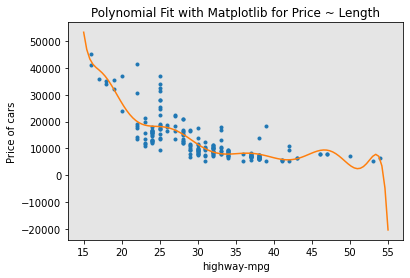

In [69]:
plotpolly(p,x,y,'highway-mpg')

In [70]:
# perform a polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures

In [73]:
#create a PolynomialFeatures object of degree 2
p2 = PolynomialFeatures(degree =2)
p2

PolynomialFeatures()

In [74]:
zp2=p2.fit_transform(z)

In [78]:
z.shape

(201, 4)

In [77]:
zp2.shape

(201, 15)

### Pipeline

#### Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler